In [52]:
from google.colab import files #importing dataset from local system to colab
uploaded = files.upload()

Saving churn_data_st.csv to churn_data_st (2).csv


In [53]:
pip install PyCaret

In [0]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport 
from pycaret.classification import *

In [55]:
ls

 catboost_info/          'churn_data_st (2).csv'   sample_data/
'churn_data_st (1).csv'   churn_data_st.csv        xgb_model.pkl


In [0]:
df = pd.read_csv('churn_data_st.csv')

In [57]:
profile = ProfileReport(df,title='Pandas Profiling Report')
profile

In [58]:
print(df.shape)
df.head()

(7043, 10)


,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [59]:
df_setup = setup(df, target='Churn',ignore_features=['customerID'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1286
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(7043, 10)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [60]:
df_setup

(      tenure  MonthlyCharges  ...  Contract_Two year  PaperlessBilling_Yes
 0        1.0           29.85  ...                0.0                   1.0
 1       34.0           56.95  ...                0.0                   0.0
 2        2.0           53.85  ...                0.0                   1.0
 3       45.0           42.30  ...                0.0                   0.0
 4        2.0           70.70  ...                0.0                   1.0
 ...      ...             ...  ...                ...                   ...
 7038    24.0           84.80  ...                0.0                   1.0
 7039    72.0          103.20  ...                0.0                   1.0
 7040    11.0           29.60  ...                0.0                   1.0
 7041     4.0           74.40  ...                0.0                   1.0
 7042    66.0          105.65  ...                1.0                   1.0
 
 [7043 rows x 18 columns], 0       0
 1       0
 2       1
 3       0
 4       1
     

In [61]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.795300,0.833600,0.500800,0.648800,0.564800,0.434000
1,Logistic Regression,0.792700,0.828900,0.496100,0.641500,0.559100,0.426600
2,Ada Boost Classifier,0.791100,0.831000,0.506900,0.633300,0.562800,0.427800
3,Ridge Classifier,0.790700,0.000000,0.471000,0.645700,0.544100,0.412600
4,Gradient Boosting Classifier,0.790100,0.831900,0.492400,0.634800,0.554300,0.419900
5,Linear Discriminant Analysis,0.788000,0.823400,0.519100,0.620900,0.565100,0.426500
6,CatBoost Classifier,0.786000,0.824800,0.482400,0.626000,0.544600,0.407900
7,Light Gradient Boosting Machine,0.785000,0.819800,0.496200,0.618200,0.550300,0.411300
8,Random Forest Classifier,0.768200,0.768700,0.434300,0.585500,0.498400,0.352000
9,K Neighbors Classifier,0.764100,0.746800,0.444200,0.572100,0.499900,0.348700


This is the first step recommended in supervised machine learning experiments (classification or regression). This function trains all the models in the model library and compares the common evaluation metrics using k-fold cross validation (by default 10 folds). The evaluation metrics used are:

**For Classification:** Accuracy, AUC, Recall, Precision, F1, Kappa

**For Regression:** MAE, MSE, RMSE, R2, RMSLE, MAPE


Creating a model in any module of PyCaret is as simple as writing create_model('model_name'). It takes only one parameter

**Model tunning**

tune_model('model_name')

 **Ensemble Model**

dt = create_model('model_name')# ensembling a trained dt model

**Plot Model** 

plot_model('model_name, plot = 'auc')# Decision Boundary

Evalute model 

evaluate_model(model_name)

Interpret Model 

interpret_model(model_name)# correlation plot


In [62]:
xgb_model=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7606,0.8021,0.3923,0.5667,0.4636,0.3161
1,0.7972,0.8452,0.4923,0.6531,0.5614,0.4328
2,0.7972,0.8424,0.4809,0.6632,0.5575,0.4302
3,0.7850,0.8092,0.5573,0.6033,0.5794,0.4353
4,0.7951,0.8220,0.4962,0.6500,0.5628,0.4321
5,0.8053,0.8649,0.4885,0.6882,0.5714,0.4501
6,0.8195,0.8636,0.5344,0.7143,0.6114,0.4969
7,0.7870,0.8432,0.5038,0.6226,0.5570,0.4188
8,0.8174,0.8468,0.5496,0.6990,0.6154,0.4979
9,0.7606,0.7999,0.3817,0.5747,0.4587,0.3130


In [78]:
xgb_model.base_score

0.5

In [63]:
tuned_xgb_model=tune_model('xgboost', optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7830,0.7946,0.4385,0.6264,0.5158,0.3815
1,0.7850,0.8237,0.4769,0.6200,0.5391,0.4020
2,0.8093,0.8288,0.5191,0.6869,0.5913,0.4701
3,0.7688,0.7940,0.5344,0.5691,0.5512,0.3957
4,0.7830,0.8093,0.4962,0.6132,0.5485,0.4078
5,0.7992,0.8373,0.4885,0.6667,0.5639,0.4374
6,0.8174,0.8525,0.5420,0.7030,0.6121,0.4953
7,0.7769,0.8336,0.4504,0.6082,0.5175,0.3766
8,0.8195,0.8383,0.5420,0.7100,0.6147,0.4996
9,0.7586,0.7844,0.3588,0.5732,0.4413,0.2976


**Ensemble Model**
 
The ensemble_model function is used for ensembling trained models. It takes only one parameter i.e. a trained model object. This functions returns a table with k-fold cross validated scores and a trained model object.


‘Bagging’ method is used for ensembling by default which can be changed to ‘Boosting’ by using the method parameter within the ensemble_model function.

In [79]:
# creating a decision tree model
dt = create_model('dt')# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7546,0.7552,0.4154,0.5455,0.4716,0.3156
1,0.7566,0.7631,0.3769,0.5568,0.4495,0.3007
2,0.7748,0.7704,0.4198,0.6111,0.4977,0.3590
3,0.7546,0.7649,0.4656,0.5446,0.5021,0.3405
4,0.7465,0.7490,0.4580,0.5263,0.4898,0.3222
5,0.7809,0.7949,0.4656,0.6162,0.5304,0.3912
6,0.7688,0.7573,0.4580,0.5825,0.5128,0.3641
7,0.7627,0.7544,0.4351,0.5700,0.4935,0.3422
8,0.7931,0.7961,0.5802,0.6179,0.5984,0.4593
9,0.7546,0.7462,0.3817,0.5556,0.4525,0.3013


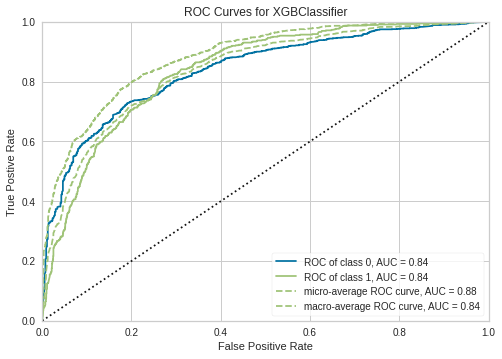

In [64]:
plot_model(tuned_xgb_model, plot = 'auc')

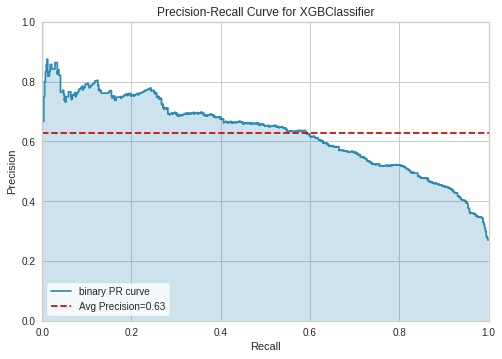

In [65]:
plot_model(tuned_xgb_model, plot = 'pr')

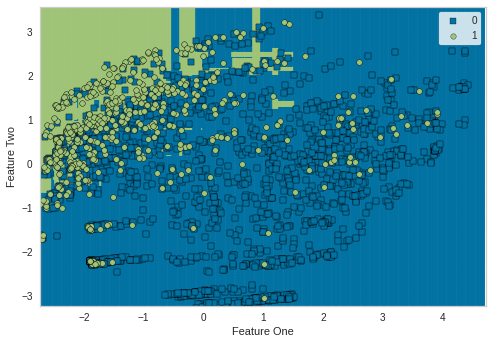

In [66]:
plot_model(tuned_xgb_model,plot= 'boundary')

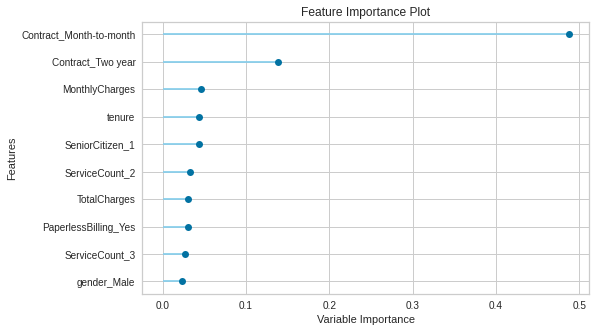

In [67]:
plot_model(tuned_xgb_model, plot='feature')

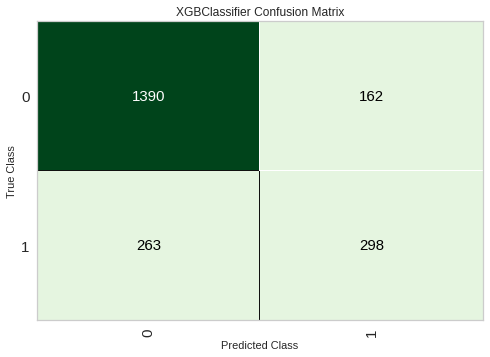

In [68]:
plot_model(tuned_xgb_model, plot = 'confusion_matrix')

In [69]:
predict_model(tuned_xgb_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7989,0.8391,0.5312,0.6478,0.5837,0.4528


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,ServiceCount_1,ServiceCount_2,ServiceCount_3,ServiceCount_4,ServiceCount_5,ServiceCount_6,ServiceCount_7,ServiceCount_8,ServiceCount_9,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn,Label,Score
0,43.0,94.30,3953.15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0.5596
1,24.0,49.70,1218.25,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.2749
2,5.0,46.00,221.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.5599
3,70.0,113.65,7939.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,0.1130
4,67.0,89.55,6373.10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.2166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,1.0,73.00,73.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.8168
2109,12.0,78.85,876.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.2500
2110,24.0,96.55,2263.45,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.1524
2111,1.0,85.05,85.05,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.8911


In [70]:
xgb_final = finalize_model(tuned_xgb_model)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1286,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

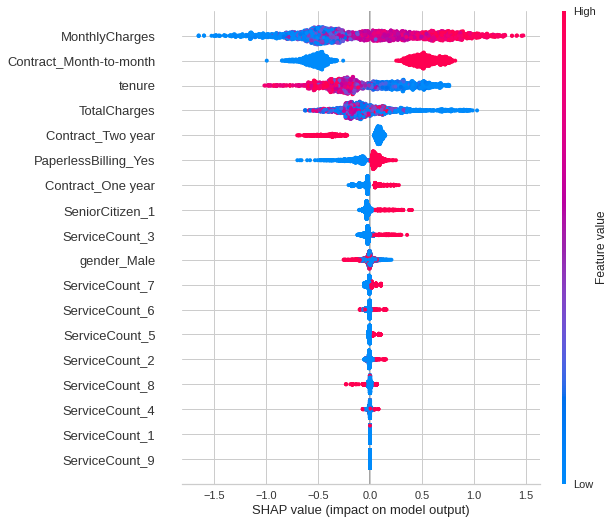

In [71]:
interpret_model(tuned_xgb_model)

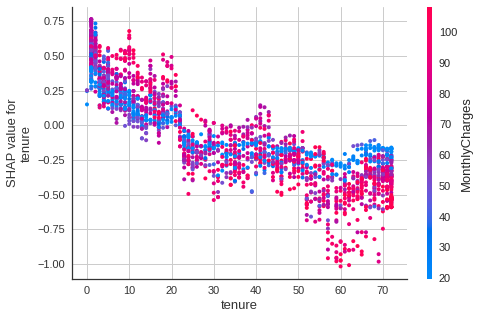

In [72]:
interpret_model(tuned_xgb_model, plot= 'correlation')

In [73]:
save_model(tuned_xgb_model,'xgb_model')

Transformation Pipeline and Model Succesfully Saved


In [74]:
ls

 catboost_info/          'churn_data_st (2).csv'   sample_data/
'churn_data_st (1).csv'   churn_data_st.csv        xgb_model.pkl


In [75]:
load_xgb=load_model('xgb_model')

Transformation Pipeline and Model Sucessfully Loaded


In [76]:
load_xgb

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Cata...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()), ('dummy', Dummify(target='Churn')),
                 ('fix_perfect', Remove_100(target='Churn')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.25, max_delta_step=0, max_depth=20,
               min_child_weight=3, missing=nan, n_estimators=10, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=1286,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.2, verbosity=0)]

In [77]:
evaluate_model(tuned_xgb_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…